# **Tugas Implementasi GPU (Pixelization)**

 **Nama Anggota Kelompok :**
1.   Risma Faoziya (24060119120001)
2.   Doma Zaneta (24060119140069)
3.   Merry Tantri Millenia Tobing (24060119120013)
4.   Salma Safira Ramadhanti (24060119140109)

Komputasi Tersebar dan Paralel (A)

## **A. Import Library**

In [1]:
import cv2
import time
import math
import glob
from google.colab.patches import cv2_imshow
import numpy as np
import cupy as cp
import numba
import matplotlib.pyplot as plt
from PIL import Image
from numba import jit, cuda
# to measure exec time
from timeit import default_timer as timer 
import PIL
import os 
from numpy import asarray

In [2]:
!unzip image.zip

Archive:  image.zip
  inflating: 1024.jpg                
  inflating: 1800.jpg                
  inflating: 256.jpg                 
  inflating: 4000.jpg                
  inflating: 512.jpg                 


In [ ]:
def plot_comparison(d_s,d_p,title):
  plt.figure(figsize=(11,6))
  speedup = sum(d_s.values())/sum(d_p.values())
  print('Average Speedup:',str(int(speedup))+'x')
  x = sorted(list(map(int,d_s.keys())))
  y_s= [d_s[str(i)] for i in x]
  y_p= [d_p[str(i)] for i in x]
  labels = ['{}x{}'.format(i,i) for i in x]
  plt.plot(x,y_s,marker='o')
  plt.plot(x,y_p,marker='o')
  plt.xticks(x,labels,rotation=45)
  plt.xlabel('RESOLUTION')
  plt.ylabel('Time in ms')
  plt.legend(['Sequential','CUDA'])
  plt.title(title)
  plt.show

In [ ]:
def adj_show(a,b):
  dim = a.shape
  dim_border = (a.shape[0],30) if len(dim)==2 else (a.shape[0],30,3)
  cv2_imshow(np.concatenate((a,255*np.ones(dim_border),b),axis=1))

In [ ]:
images={}
for filename in glob.glob('*.jpg'):
    im=cv2.imread(filename)
    images[filename.split('.')[0]]=im
images.keys()

dict_keys(['1024', '4000', '512', '1800', '256'])

In [ ]:
def img_to_array(img):
  image = Image.open(img)
  # convert image to numpy array
  data = asarray(image)
  return data

In [ ]:
def display(b):
  img = Image.fromarray(b, 'RGB')
  img.save('hasil.png')
  img9 = cv2.imread('hasil.png')
  cv2_imshow(img9)


In [ ]:
# array untuk menyimpan hasil serial
ser = []
# array untuk menyimpan hasil paralel
par = []

## **Serial (CPU)**


In [ ]:
#serial
def pixelize_s(img, window):
    n, m, _ = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n, m, 3))
    for x in range(0, n, window):
        for y in range(0, m, window):
            img1[x:x+window,y:y+window] = img[x:x+window,y:y+window].mean(axis=(0,1))
    return img1

## **Paralel (GPU)**

In [ ]:
@cp.fuse() 
def pixelize_p(img,n):
  imgSmall=img.resize((n,n))
  result = imgSmall.resize(img.size,Image.NEAREST)
  result.save('result.png')
  os.system('result.png')
  c = img_to_array('result.png')
  par.append(c)
  return par

## **Run code Pixelization CPU-GPU**

In [ ]:
images = ['256.jpg', '1024.jpg', '512.jpg', '1800.jpg', '4000.jpg']

In [ ]:
#run code
if __name__=="__main__":
    ts = []
    tp = []
    n = 16  
    #without gpu
    start = timer()
    for i in images:
      img = Image.open(i)
      img = np.array(img)
      pixelize_s(img,n)
      os1 = timer()-start
      ts.append(os1)
    print("without GPU:", ts) 

    #with gpu
    start = timer()
    for i in images:
       img = Image.open(i)
       pixelize_p(img,n)
       op2 = timer()-start
       tp.append(op2)
    print("with GPU:", tp)

without GPU: [0.04441478000001098, 0.20440438900001823, 0.23888962400002356, 0.7882851220000191, 3.476885772000003]
with GPU: [0.028358617999998614, 0.11538845599997671, 0.1530955509999785, 0.40805768199999193, 1.5107301779999887]


In [ ]:
images_ser = ['256','1024','512','1800','4000']

In [ ]:
d_ser = dict(zip(images_ser,ts))
d_par = dict(zip(images_ser,tp))
print(d_ser)
print(d_par)

{'256': 0.04441478000001098, '1024': 0.20440438900001823, '512': 0.23888962400002356, '1800': 0.7882851220000191, '4000': 3.476885772000003}
{'256': 0.028358617999998614, '1024': 0.11538845599997671, '512': 0.1530955509999785, '1800': 0.40805768199999193, '4000': 1.5107301779999887}


## **Selisih Runtime Pixelization CPU dan GPU**

In [ ]:
# Fungsi untuk menghitung selisih runtime rata2
import numpy as np 
import pandas as pd
def sub_aver(a,b):
  c = list(a.keys())
  d = list(b.keys())
  sum=0
  result=0
  for i in range(0,len(c)):
    result = a.get(c[i])-b.get(d[i])
    sum+=result
  sum/=len(c)
  return sum

In [ ]:
# selisih runtime rata2 Negative Filter Conversion
sub_aver(d_ser,d_par)

0.507449840400028

## **Hasil-Plot Runtime Pixelization CPU-GPU**

Average Speedup: 2x


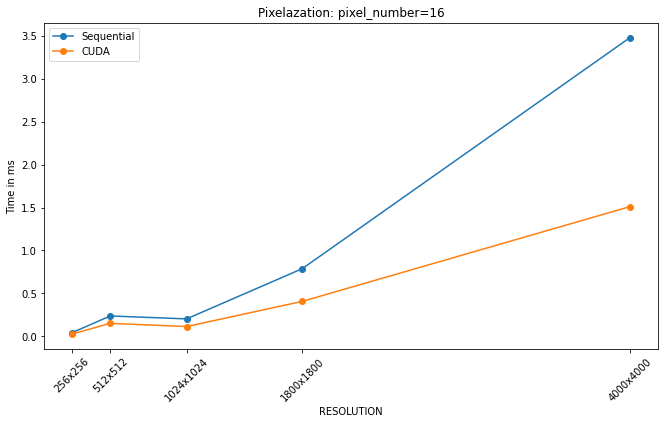

In [ ]:
plot_comparison(d_ser,d_par,'Pixelazation: pixel_number={}'.format(n))

## **Show Image**

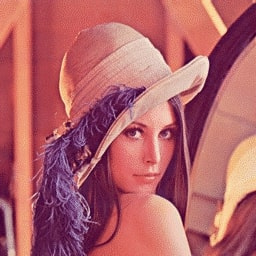

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#show image
img_asli = cv2.imread('256.jpg')
cv2_imshow(img_asli)

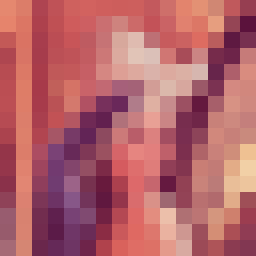

In [ ]:
display(par[0])